# TensorFlow Tutorial: 1. Basics

*This is part of a tutorial series on getting started with TensorFlow by Yen Lee Loh.  Edited 2023-6-10.*

First import the packages that we'll be using:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)
rng = np.random.default_rng()
import tensorflow.keras as keras
from tqdm.keras import TqdmCallback
import cute ; import importlib ; importlib.reload (cute) ;


$\newcommand{\mean}[1]{\langle #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 \rvert}$
$\newcommand{\ket}[1]{\lvert #1 \rangle}$
$\newcommand{\adag}{a^\dagger}$
$\newcommand{\mat}[1]{\underline{\underline{\mathbf{#1}}}}$
$\newcommand{\beq}{\qquad\begin{align}}$
$\newcommand{\eeq}{\end{align}}$
$\newcommand{\half}{\frac{1}{2}}$


### Linear regression: $y=wx + b$

TBD: Add explanation of what TensorFlow is doing here.

Loss =  0.3683500587940216
Weights and biases =  [1.477] , [1.312]


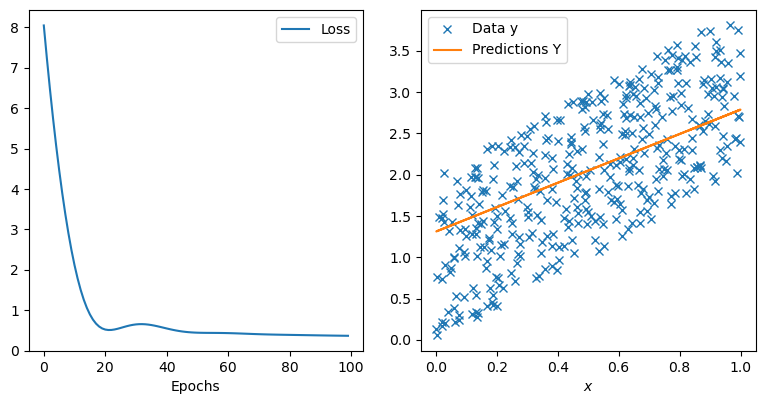

In [15]:
#======== Generate synthetic dataset
nmax = 400
dmax = 1
xndT = rng.uniform (size=(nmax,dmax))
yndT = (xndT @ [2.0] + 1.0)   + 1.0*rng.uniform (-1,1, size=(nmax,))
#======== Build linear model
model = keras.Sequential([
  keras.layers.InputLayer ((1,)),
  keras.layers.Dense      (1)
])
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile (optimizer=optimizer, loss='mean_squared_error')
#model.summary ()
#======== Train and track training
history = model.fit(xndT, yndT, batch_size=nmax, verbose=0, epochs=100)
loss = history.history['loss']
epochs = range(len(loss))
fig,axs = plt.subplots (1,2, figsize=(8,4)); fig.tight_layout()
ax = axs[0]
ax.plot (epochs, loss, label='Loss'); ax.set_ylim(bottom=0); ax.set_xlabel('Epochs'); ax.legend()
#======== Evaluate
losses = model.evaluate (xndT, yndT, verbose=0)
print("Loss = ", losses)
#======== Examine model and fit
weights = model.get_layer(index=0).weights[0].numpy()
biases = model.get_layer(index=0).weights[1].numpy()
print ('Weights and biases = ', weights.flatten(), ',', biases)
YndT = model.predict (xndT, verbose=0)
ax = axs[1]
ax.plot (xndT[:,0], yndT[:], 'x', label='Data y')
ax.plot (xndT[:,0], YndT[:], '-', label='Predictions Y')
ax.set_xlabel ('$x$'); ax.legend();

### Linear regression in 2D: $y = w_0 x_0 + w_1 x_1 + b$

Loss =  0.08041990548372269
Weights and biases =  [ 0.99  -1.014] , [0.027]


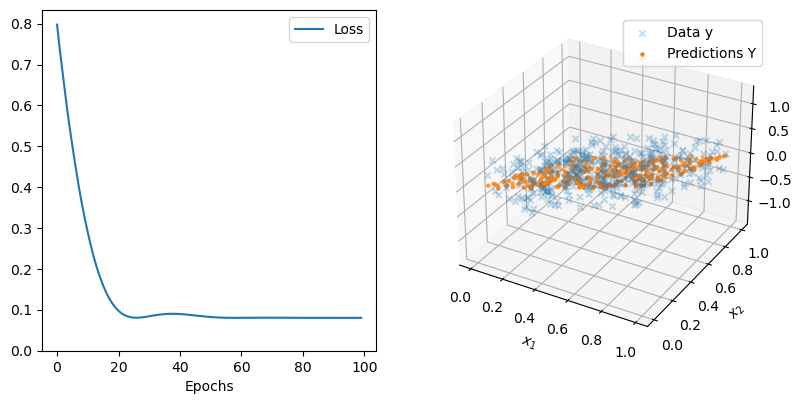

In [16]:
#======== Generate synthetic dataset
nmax = 400
dmax = 2
xndT = rng.uniform (size=(nmax,dmax))
yndT = xndT @ [1,-1] + rng.uniform (-.5, .5, size=(nmax,))    # actually ynT
#======== Build linear model
model = keras.Sequential([
  keras.layers.InputLayer ((2,)),
  keras.layers.Dense      (1)
])
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile (optimizer=optimizer, loss='mean_squared_error')
#model.summary ()
#======== Train and track training
history = model.fit(xndT, yndT, batch_size=nmax, verbose=0, epochs=100)
loss = history.history['loss']
epochs = range(len(loss))
fig,axs = plt.subplots (1,2, figsize=(8,4)); fig.tight_layout(); axs[1].axis('off')
ax = axs[0]
ax.plot (epochs, loss, label='Loss'); ax.set_ylim(bottom=0); ax.set_xlabel('Epochs'); ax.legend()
#======== Evaluate
losses = model.evaluate (xndT, yndT, verbose=0)
print("Loss = ", losses)
#======== Examine model and fit
weights = model.get_layer(index=0).weights[0].numpy()
biases = model.get_layer(index=0).weights[1].numpy()
print ('Weights and biases = ', weights.flatten(), ',', biases)
YndT = model.predict (xndT, verbose=0)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter (xndT[:,0], xndT[:,1], yndT, marker='x', label='Data y', alpha=.25)
ax.scatter (xndT[:,0], xndT[:,1], YndT, marker='.', label='Predictions Y')
ax.set_xlabel ('$x_1$'); ax.set_ylabel ('$x_2$'); ax.legend();

### Logistic regression: $y=S(wx + b)$ where $S(z) = 1/(1+e^{-z})$

Losses and metrics =  0.33837610483169556 0.8666666746139526
Weights and biases =  [0.627] , [-4.688]


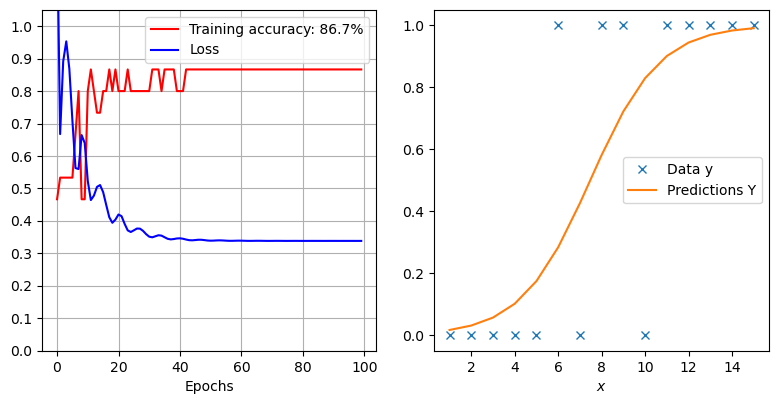

In [17]:
#======== Generate synthetic dataset
xndT = np.array ([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]], dtype=float).T
yndT = np.array ([[0,0,0,0,0,1,0,1,1, 0, 1, 1, 1, 1, 1]], dtype=float).T
#======== Build model
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(1,)),
  keras.layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.Adam(learning_rate=0.3)
model.compile (optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#model.summary ()
#======== Train and track training
history = model.fit(xndT, yndT, batch_size=nmax, verbose=0, epochs=100)
loss = history.history['loss']
accu = history.history['accuracy']
epochs = range(len(loss))
fig,axs = plt.subplots (1,2, figsize=(8,4)); fig.tight_layout()
ax = axs[0]
ax.plot (epochs, accu, 'r', label=f'Training accuracy: {accu[-1]*100:.1f}%')
ax.plot (epochs, loss, 'b', label='Loss')
ax.set_xlabel('Epochs'); ax.set_yticks (np.arange(0,1.01,.1)); ax.set_ylim([0,1.05]); ax.legend(); ax.grid ()
#======== Evaluate
losses,metrics = model.evaluate (xndT, yndT, verbose=0)
print("Losses and metrics = ", losses, metrics)
#======== Examine model and fit
weights = model.get_layer(index=0).weights[0].numpy()
biases = model.get_layer(index=0).weights[1].numpy()
print ('Weights and biases = ', weights.flatten(), ',', biases)
YndT = model.predict (xndT, verbose=0)
ax = axs[1]
ax.plot (xndT[:,0], yndT[:], 'x', label='Data y')
ax.plot (xndT[:,0], YndT[:], '-', label='Predictions Y')
ax.set_xlabel ('$x$'); ax.legend();

### Logistic regression with asymmetric loss function

Training model with BinaryCrossentropy loss...
Epoch = 9
Training model with BinaryFocalCrossentropy loss...
Epoch = 9


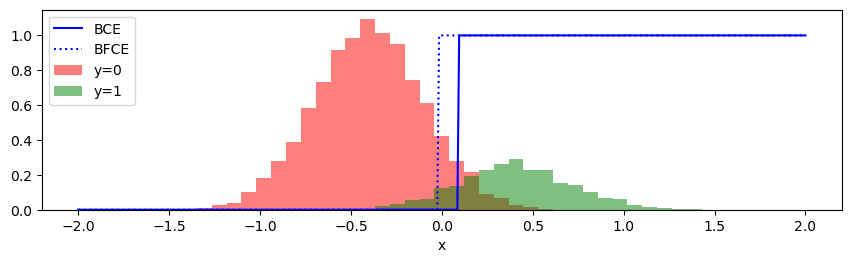

In [18]:
#======== Generate dataset
n0,n1   = 8000,2000
mu0,mu1 = -0.4,+0.4
sig     = 0.3
rng = np.random.default_rng(seed=1234)
xndT = rng.normal (n0*[mu0] + n1*[mu1], sig) [:, np.newaxis]
yndT = np.array (n0*[0] + n1*[1])            [:, np.newaxis]
xndA = np.linspace (-2.0, 2.0, 400)     # For plotting purposes
#======== Model with BCE
model = keras.models.Sequential (keras.layers.Dense(1, activation='sigmoid'))
optimizer = keras.optimizers.Adam (learning_rate=0.4)
loss = keras.losses.BinaryCrossentropy()
model.compile (optimizer=optimizer, loss=loss)
print ('Training model with BinaryCrossentropy loss...')
model.fit (xndT, yndT, verbose=0, epochs=10, callbacks=[cute.simpleCallback])
YndA = model.predict (xndA, verbose=0)
#======== Model with BFCE
model = keras.models.Sequential (keras.layers.Dense(1, activation='sigmoid'))
optimizer = keras.optimizers.Adam (learning_rate=0.4)
loss = keras.losses.BinaryFocalCrossentropy (apply_class_balancing=True, alpha=n0/(n0+n1))  # larger weight on class 1
model.compile (optimizer=optimizer, loss=loss)
print ('Training model with BinaryFocalCrossentropy loss...')
model.fit (xndT, yndT, verbose=0, epochs=10, callbacks=[cute.simpleCallback])
YndB = model.predict (xndA, verbose=0)
#======== Plot comparison
fig,axs = cute.axgrid (8,2,removeticks=False); ax=axs[0,0]
# ax.hist ( xndT [np.where (yndT==0)], alpha=.3, bins=20, density=True, label='y=0')
# ax.hist ( xndT [np.where (yndT==1)], alpha=.3, bins=20, density=True, label='y=1')
bins = np.linspace (-2.0, 2.0, 50); binwidth = bins[1]-bins[0]
counts0,_ = np.histogram(xndT[np.where(yndT==0)], bins=bins)
counts1,_ = np.histogram(xndT[np.where(yndT==1)], bins=bins)
counts = np.sum(counts0)+np.sum(counts1)
plt.bar (bins[:-1], counts0/counts/binwidth, alpha=.5, align='edge', width=binwidth, label='y=0', fc='r')
plt.bar (bins[:-1], counts1/counts/binwidth, alpha=.5, align='edge', width=binwidth, label='y=1', fc='g')
ax.plot (xndA, YndA.round(), 'b-', label='BCE')
ax.plot (xndA, YndB.round(), 'b:', label='BFCE')
ax.legend(); ax.set_xlabel ('x');

- The code above generates a set of input-output pairs $(x_n,y_n)$, representing pixel brightnesses and foreground/background labels.
- Generally, foreground pixels are brighter than background pixels, but the distributions of brightnesses have some overlap.
- There are 8000 instances where $y_n=0$ (background pixels) but only 2000 instances where $y_n=1$ (foreground pixels).
- The solid vertical blue line shows the decision boundary produced by logistic regression using the standard BCE loss function.
- The dashed vertical blue line shows the decision boundary obtained using the BFCE loss function with class balancing.  In the BFCE loss function, we chose the alpha parameter to be 0.8.  This means that foreground pixels are "treated 4 times more seriously" than background pixels.  This compensates for the imbalance in the class sizes.

### Two ways of building the same model

In [19]:
#======== Method 1: use Sequential (simpler)
model = keras.Sequential([
  keras.layers.InputLayer (input_shape=(3,)),
  keras.layers.Dense      (1)
])
#======== Method 2: define layer relationships manually (more flexible because this is not restricted to a sequence of layers)
inputs  = keras.Input        ((3,))
outputs = keras.layers.Dense (1)    (inputs)
model   = keras.Model        ([inputs], [outputs])
#model.summary ()